#House Pricing Regression

<br>
<br>

<br>
<br>

### **Load Libraries and Data**

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<br>


Data Source: https://www.kaggle.com/fedesoriano/the-boston-houseprice-data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

url = "..."
data = pd.read_csv(url)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.shape

(506, 14)

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<br>

## EDA

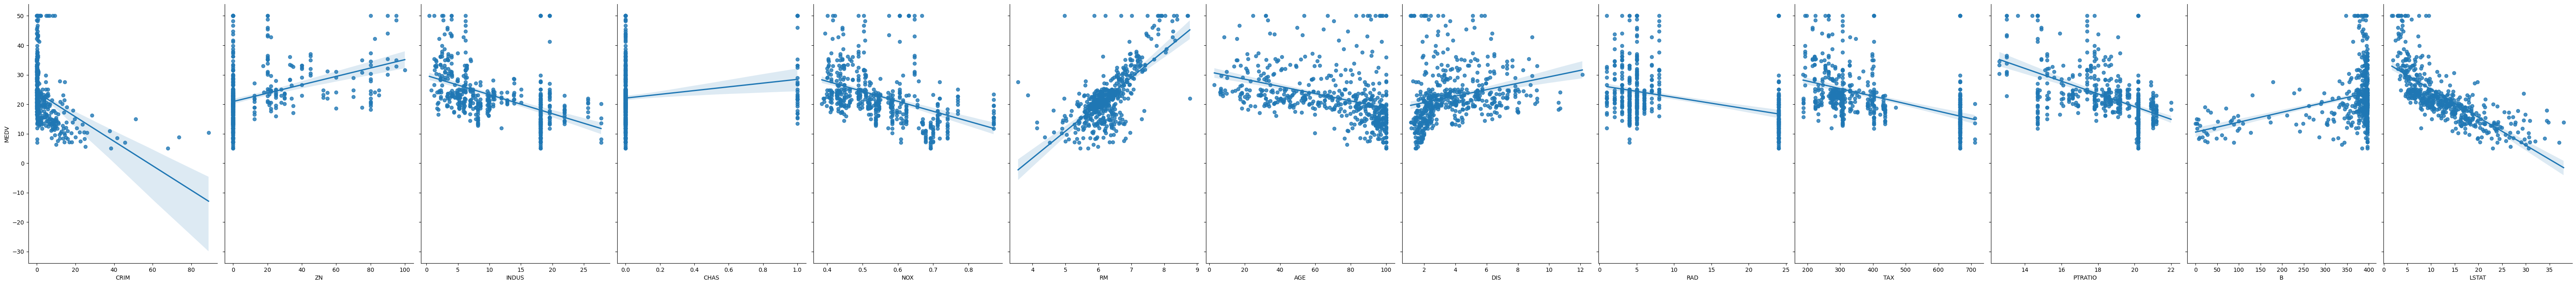

In [9]:
sns.pairplot(data, x_vars=['CRIM', 'ZN','INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO','B','LSTAT'], y_vars='MEDV', height=7, aspect=0.7, kind='reg')

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

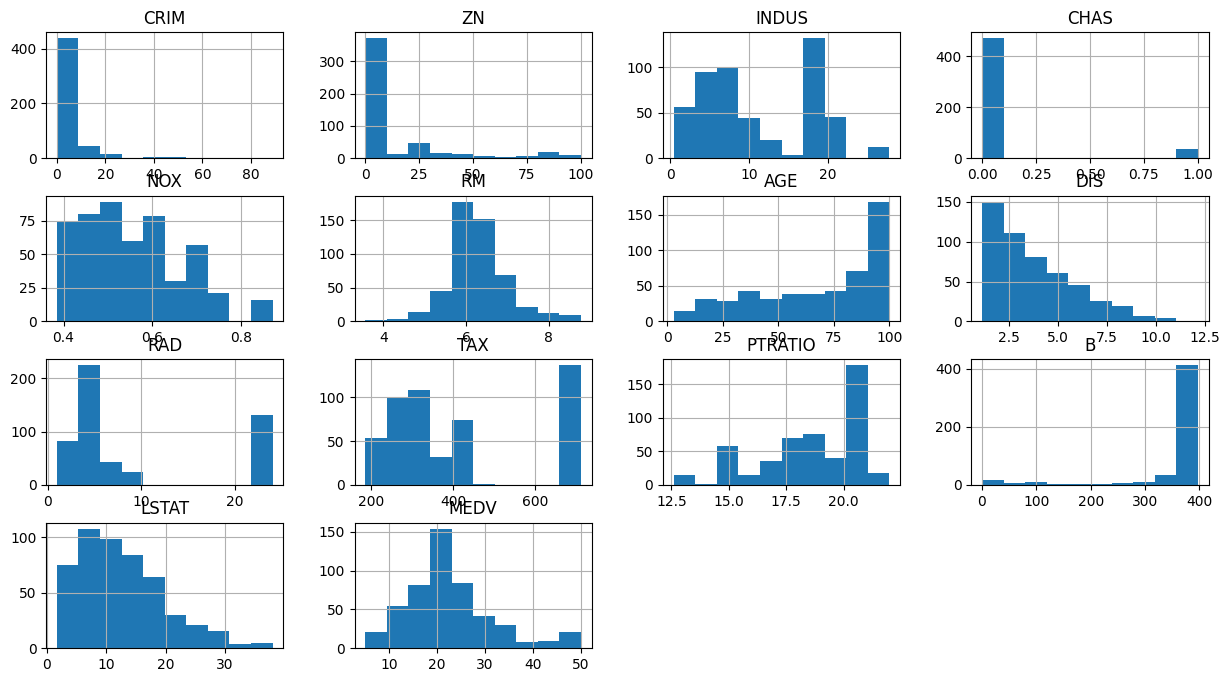

In [8]:
data.hist(figsize=(15,8))

<Axes: >

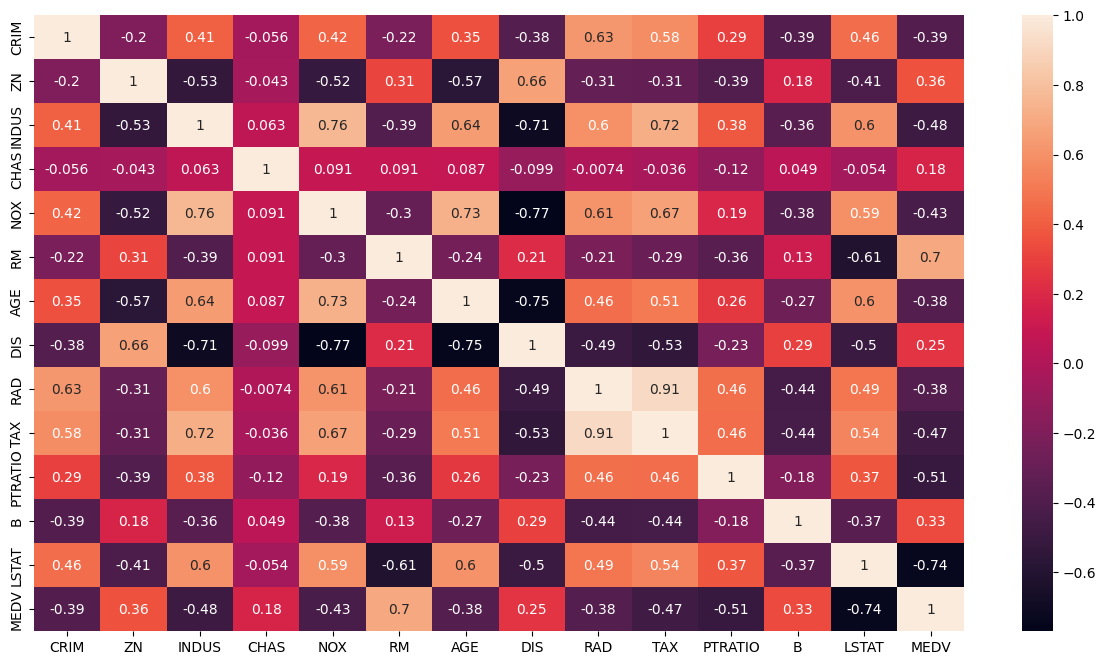

In [10]:
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(),annot=True)

In [11]:
data["CRIM"] = np.log(data["CRIM"]+1)

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

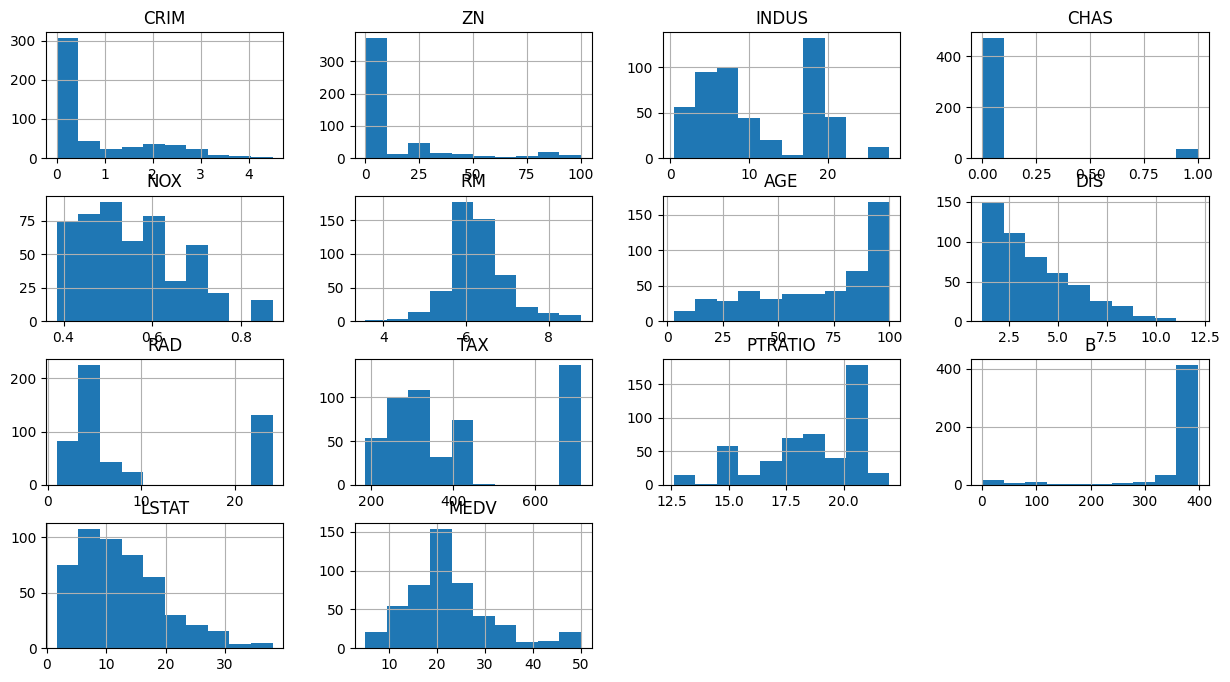

In [12]:
data.hist(figsize=(15,8))

<Axes: >

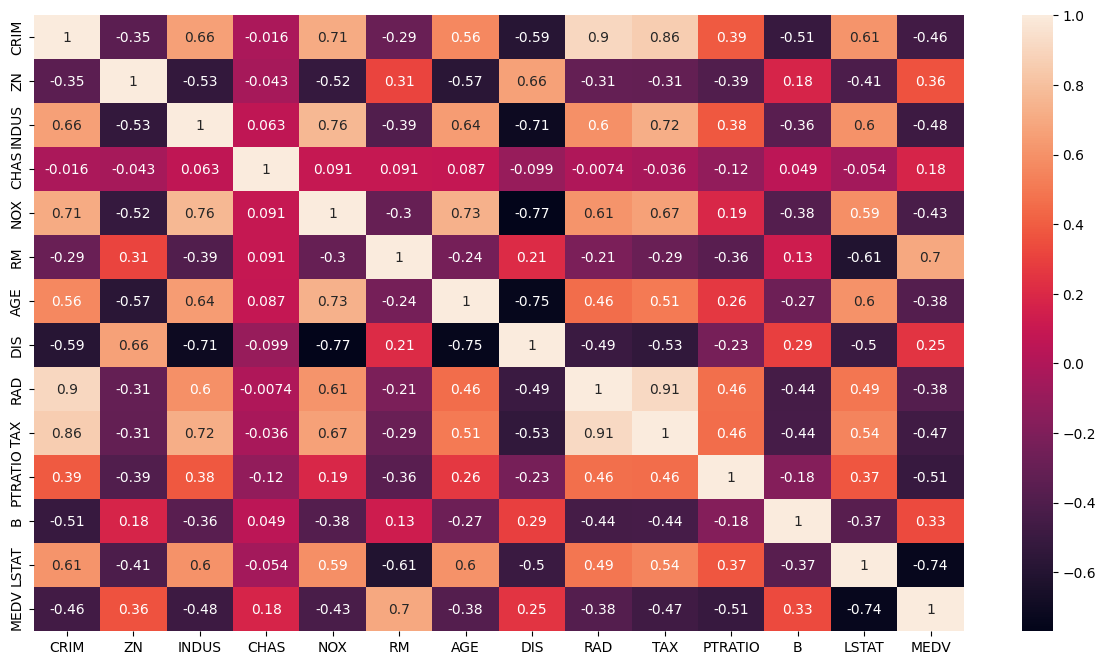

In [13]:
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(),annot=True)

<br>

## Data Split

I am gonna left out every column with correlation |0.35| < 0

In [14]:
features = ['CRIM', 'ZN','INDUS','NOX','RM', 'AGE', 'RAD', 'TAX', 'PTRATIO','LSTAT']
target = ['MEDV']

In [25]:
X=data[features]
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.006300,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,4.98
1,0.026944,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,9.14
2,0.026924,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,4.03
3,0.031857,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,2.94
4,0.066770,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,5.33


In [26]:
y=data.MEDV
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 10)
(102, 10)
(404,)
(102,)


<br>

# Linear Regession Model

In [28]:
Scaler = StandardScaler()
linregressor = LinearRegression()
#X_train = Scaler.fit_transform(X_train)

In [29]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_test = linregressor.predict(X_test)

In [37]:
# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error του μοντέλου
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Model performance for the test data")
print("--------------------------------------")
print('Mean Absolute Error = {:.3f}'.format(mae))
print('Root Mean Squared Error = {:.3f}'.format(rmse))
print('R2 score = {:.3f}'.format(linregressor.score(X_test, y_test)))

Model performance for the test data
--------------------------------------
Mean Absolute Error = 3.814
Root Mean Squared Error = 4.925
R2 score = 0.718


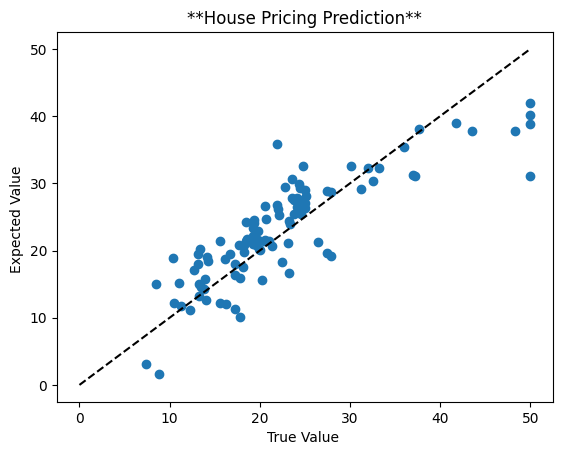

In [51]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 50], [0, 50], '--k')

plt.title('**House Pricing Prediction**')
plt.xlabel('True Value ')
plt.ylabel('Expected Value ')
plt.show()

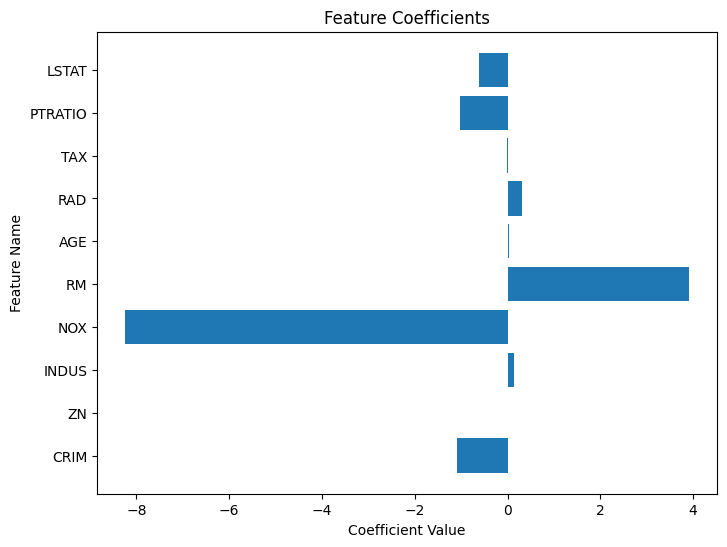

In [38]:
feature_names = features
coefficients = linregressor.coef_

plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients)

plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Coefficients')

plt.show()

<br>

# Random Forest Regressor

In [65]:
rfr = RandomForestRegressor(n_estimators=150, max_features=3)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=3, n_estimators=150)

In [66]:
y_pred_test_rfr = rfr.predict(X_test)

In [67]:
# mean absolute error
mae_rfr=metrics.mean_absolute_error(y_test, y_pred_test_rfr)
# root mean square error του μοντέλου
rmse_rfr = (np.sqrt(mean_squared_error(y_test, y_pred_test_rfr)))


print("Model performance for the test data")
print("--------------------------------------")
print('Mean Absolute Error = {:.3f}'.format(mae))
print('Root Mean Squared Error = {:.3f}'.format(rmse))
print('R2 score = {:.3f}'.format(rfr.score(X_test, y_test)))


Model performance for the test data
--------------------------------------
Mean Absolute Error = 3.814
Root Mean Squared Error = 4.925
R2 score = 0.858


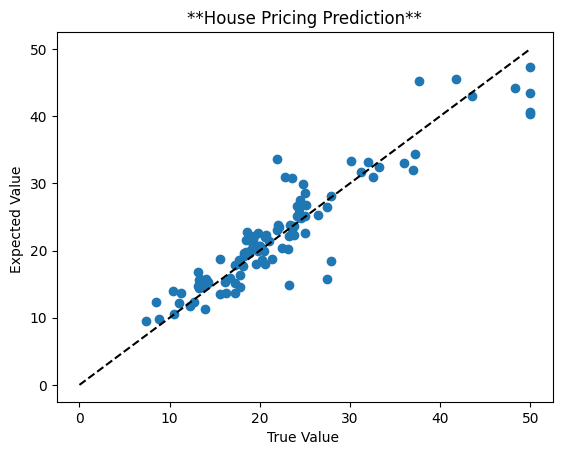

In [68]:
plt.scatter(y_test, y_pred_test_rfr)

plt.plot([0, 50], [0, 50], '--k')

plt.title('**House Pricing Prediction**')
plt.xlabel('True Value ')
plt.ylabel('Expected Value ')
plt.show()

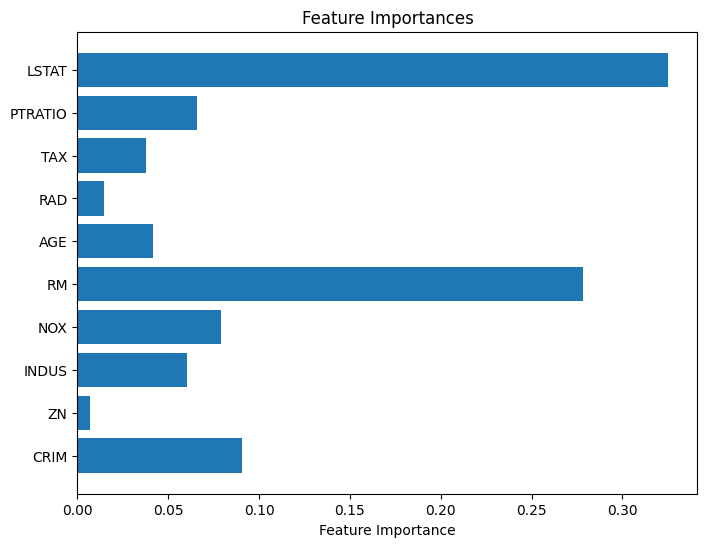

In [77]:

feature_importances = rfr.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()